In [1]:
import numpy as np
import h5py
import time
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
%matplotlib notebook
from collections import Counter
import math
import cv2
import scipy.stats
import seaborn as sns
import pandas as pd
import itertools
import csv
from joblib import dump, load

# Load in data

In [2]:
def correct_length(pos_list):
    for i in range(len(pos_list)):
        if len(pos_list[i]) == 20:
            continue
        elif len(pos_list[i]) > 20:
            pos_list[i] = pos_list[i][0:20]
        else:
            for j in range(20 - len(pos_list[i])):
                pos_list[i].append(np.nan)
    return pos_list

def load_csv_data(filepath):
    
    with open(filepath,'r',newline='') as f:
        csv_reader = csv.reader(f)
        
        data_1 = []
        data_2 = []
        counter = 0
        
        for row in csv_reader:
            try:
                data_1.append([float(i) for i in (row[0][1:-1]).split(', ')])
                data_2.append([float(i) for i in (row[1][1:-1]).split(', ')])
            except:
                counter += 1
                data_1.append([np.nan for i in range(20)])
                data_2.append([np.nan for i in range(20)])
            
    print(counter)
    return [correct_length(data_1), correct_length(data_2)]

In [3]:
# # load in data
# xy_spine = load_csv_data('./Project/LargeCrop/Code/spinexy_points20_2.csv')
# xz_spine = load_csv_data('./Project/LargeCrop/Code/spinexz_points20_2.csv')
# yz_spine = load_csv_data('./Project/LargeCrop/Code/spineyz_points20_2.csv')

# load in data
xy_spine = load_csv_data('./Project/LargeCrop/Code/spine0_20.csv')
xz_spine = load_csv_data('./Project/LargeCrop/Code/spinexz_points20.csv')
yz_spine = load_csv_data('./Project/LargeCrop/Code/spineyz_points20.csv')

# load in data
pathangles = './Project/LargeCrop/Code/angles0_20.csv'

with open(pathangles,'r',newline='') as f:
    csv_reader = csv.reader(f)
    line_count = 0
    angles_20 = []
    for row in csv_reader:
        angles_20.append([float(i) for i in row])


# load in data
file_paths = ["./Project/LargeCrop/predictions/20201119/bottomup/pred_FishTank20200416_160648/results/FishTank20200416_160648/FishTank20200416_160648.h5",
              "./Project/LargeCrop/predictions/20201119/bottomup/pred_FishTank20200413_154621/results/FishTank20200413_154621/FishTank20200413_154621.h5",
              "./Project/LargeCrop/predictions/20201120/pred_FishTank20200414_154100/results/FishTank20200414_154100/FishTank20200414_154100.h5",
              "./Project/LargeCrop/predictions/20201120/pred_FishTank20200415_154234/results/FishTank20200415_154234/FishTank20200415_154234.h5",
              "./Project/LargeCrop/predictions/20201120/pred_FishTank20200417_154139/results/FishTank20200417_154139/FishTank20200417_154139.h5",
              "./Project/LargeCrop/predictions/20201120/pred_FishTank20200418_160144/results/FishTank20200418_160144/FishTank20200418_160144.h5",
              "./Project/LargeCrop/predictions/20201120/pred_FishTank20200419_151352/results/FishTank20200419_151352/FishTank20200419_151352.h5",
              "./Project/LargeCrop/predictions/20201120/pred_FishTank20200419_173651/results/FishTank20200419_173651/FishTank20200419_173651.h5",
              "./Project/LargeCrop/predictions/20201120/pred_FishTank20200420_153056/results/FishTank20200420_153056/FishTank20200420_153056.h5",
              "./Project/LargeCrop/predictions/20201120/pred_FishTank20200420_175237/results/FishTank20200420_175237/FishTank20200420_175237.h5",
             ]

# All data variables
speeds_frametoframe = []
data_3D_filtered = []
angles_upperbody_360 = []
angles_upperbody_180 = []
upperbody_angles_xy = []
upperbody_angles_z = []
tail_angles_xy = []
tail_angles_z = []
speed_xyz = []
speed_upperbody_angles_xy = []
speed_upperbody_angles_z = []
speed_tail_angles_xy = []
speed_tail_angles_z = []
data_3D = []
original_instances = []

for file_path in file_paths:
    with h5py.File(file_path, 'r') as f:
        original_instances.append(np.copy(f['original_instances']))
        data_3D.append(np.copy(f['tracks_3D']))
        speeds_frametoframe.append(np.copy(f['speed_frametoframe']))
        data_3D_filtered.append(np.copy(f['tracks_3D_no_outliers_60']))
        angles_upperbody_360.append(np.copy(f['upperbody_xy_angle_0to360']))
        angles_upperbody_180.append(np.copy(f['upperbody_xy_angle_180']))
        upperbody_angles_xy.append(np.copy(f['upperbody_xy_angle_additive']))
        upperbody_angles_z.append(np.copy(f['upperbody_z_angle']))
        tail_angles_xy.append(np.copy(f['tail_xy_angle']))
        tail_angles_z.append(np.copy(f['tail_z_angle']))
        speed_xyz.append(np.copy(f['speed_xyz']))
        speed_upperbody_angles_xy.append(np.copy(f['speed_upperbody_angles_xy']))
        speed_upperbody_angles_z.append(np.copy(f['speed_upperbody_angles_z']))
        speed_tail_angles_xy.append(np.copy(f['speed_tail_angles_xy']))
        speed_tail_angles_z.append(np.copy(f['speed_tail_angles_z']))
        
# relation to fishpair image tatsuo
fishpairs=["9_top",
           "7_down",
           "7_up",
           "9_down",
           "10_down",
           "10_up",
           "8_down",
           "6_down",
           "8_up",
           "6_up"
          ]

237
7554
31884


In [4]:
print(np.array(xy_spine).shape)

(2, 573978, 20)


In [4]:
# for i in range(len(xy_spine[0])):
def point_fish(cam,i,bdp):
#     if cam == 1:
#         extra = [60,60]
#     else:
    extra=[100,100]
    return original_instances[0][cam][i][0][bdp] - original_instances[0][cam][i][0][1] + extra

spines = [xz_spine,xy_spine,yz_spine]

list_counters = [[],[],[]]
for i in range(10000,20000):
    for cam in range(3):
#         print(point_fish(cam, i, 0),point_fish(cam, i, 1),point_fish(cam, i, 2))
        if abs(point_fish(cam, i, 0)[0] - point_fish(cam, i, 2)[0]) > abs(point_fish(cam, i, 0)[1] - point_fish(cam, i, 2)[1]):
            counter = 0
            for sp in spines[cam][0][i]:
                if min(point_fish(cam,i,0)[0],point_fish(cam,i,2)[0]) < sp and max(point_fish(cam,i,0)[0],point_fish(cam,i,2)[0]) > sp:
                    counter+=1
            list_counters[cam].append(counter)
        else:
            counter = 0
            for sp in spines[cam][1][i]:
                if min(point_fish(cam,i,0)[1],point_fish(cam,i,2)[1]) < sp and max(point_fish(cam,i,0)[1],point_fish(cam,i,2)[1]) > sp:
                    counter+=1
            list_counters[cam].append(counter)
        

/home/thomasreus/Documents/Project/sleap_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


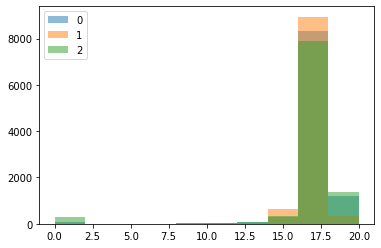

In [6]:
fig,ax = plt.subplots(1,1)
ax.hist(list_counters[0],label="0",alpha=0.5)
ax.hist(list_counters[1],label="1",alpha=0.5)
ax.hist(list_counters[2],label="2",alpha=0.5)
ax.legend()
fig.show()

# Functions

In [5]:
class Calibration(object):
    ''' A class for loading and using the calibrations for the cameras
    
    -- Methods --
    compute_imageCoord_triplet_from_XYZ
    compute_XYZ_from_imageCoord_triplet
    compute_XZ_imcoords_from_XY_YZ
    compute_XY_imcoords_from_XZ_YZ
    compute_YZ_imcoords_from_XZ_XY
    compute_point_correspondence_error
    
    '''
    
    def __init__(self, calibration_folder_path):
        ''' Instantiate the object
        
        -- args --
        calibration_folder_path: the path to a calibration folder, where the regressed functions
                                 have already been computed and saved
                                 
        '''
        # record the folder paths
        self.calibration_folder_path = calibration_folder_path
        self.python_calibration_folderPath = os.path.join(self.calibration_folder_path, 
                                                          'python_calibration_models')
        
        # load the models and assign as attributes
        self._load_models()
        
    
    def _load_models(self):
        ''' Instantiate the regression object attributes:
            xyz_getter, imCoord_getter, xz_getter, xy_getter, yz_getter 
        '''
        imCoords_to_XYZ_path = os.path.join(self.python_calibration_folderPath, 'imCoords_to_XYZ.joblib')
        XYZ_to_imCoords_path = os.path.join(self.python_calibration_folderPath, 'XYZ_to_imCoords.joblib')
        xy_yz_to_xz_path = os.path.join(self.python_calibration_folderPath, 'xy_yz_to_xz.joblib')
        xz_yz_to_xy_path = os.path.join(self.python_calibration_folderPath, 'xz_yz_to_xy.joblib')
        xz_xy_to_yz_path = os.path.join(self.python_calibration_folderPath, 'xz_xy_to_yz.joblib')
        
        self.xyz_getter = load(imCoords_to_XYZ_path)
        self.imCoord_getter = load(XYZ_to_imCoords_path)
        self.xz_getter = load(xy_yz_to_xz_path)
        self.xy_getter = load(xz_yz_to_xy_path)
        self.yz_getter = load(xz_xy_to_yz_path)
        return
    
    
    # ---- Main Methods ---- #
    
    def compute_imageCoord_triplet_from_XYZ(self, XYZ):
        ''' Predict the image coordinates in all 3 camera views of the
            3D point XYZ
            
        -- inputs --
        XYZ: array (3,), the position of a point in 3D
        
        -- returns --
        imCoords: array (3,2) of image coordinates in standard camera
                  order of XZ,XY,YZ
        '''
        imCoords = self.imCoord_getter.predict(XYZ.reshape(1,-1))
        imCoords = imCoords.reshape(3,2)
        return imCoords
    
    
    def compute_XYZ_from_imageCoord_triplet(self, imCoords):
        ''' Predict the XYZ position of the point given by the image
            coordinates from all 3 cameras

        -- Inputs --
        imCoords: array of shape (3,2)

        -- Outputs --
        XYZ: array of shape (3)

        '''
        XYZ = self.xyz_getter.predict(imCoords.reshape(-1,6))
        return XYZ
    
    
    def compute_XZ_imcoords_from_XY_YZ(self, xy_imCoord, yz_imCoord):
        ''' Given an image coordinate from both the XY and YZ views,
            compute the corresponding image coordinate from the XZ view

        -- args --
        xy_imCoord: image coordinate of shape (2,)
        yz_imCoord: image coordinate of shape (2,)

        -- returns --
        xz_imCoord: image coordinate of shape (2,)

        '''
        input_data = np.hstack((xy_imCoord, yz_imCoord)).reshape(1,4)
        xz_imCoord = self.xz_getter.predict(input_data)
        return xz_imCoord

    def compute_XY_imcoords_from_XZ_YZ(self, xz_imCoord, yz_imCoord):
        ''' Given an image coordinate from both the XZ and YZ views,
            compute the corresponding image coordinate from the XY view

        -- args --
        xz_imCoord: image coordinate of shape (2,)
        yz_imCoord: image coordinate of shape (2,)
        
        -- returns --
        xy_imCoord: image coordinate of shape (2,)
        '''
        # prepare the input for predictor, and predict the imcoord
        input_data = np.hstack((xz_imCoord, yz_imCoord)).reshape(1,4)
        xy_imCoord = self.xy_getter.predict(input_data)
        return xy_imCoord

    def compute_YZ_imcoords_from_XZ_XY(self, xz_imCoord, xy_imCoord):
        ''' Given an image coordinate from both the XY and YZ views,
            compute the corresponding image coordinate from the XZ view

        -- args --
        xz_imCoord: image coordinate of shape (2,)
        xy_imCoord: image coordinate of shape (2,)

        -- returns --
        yz_imCoord: image coordinate of shape (2,)

        '''
        # prepare the input for predictor, and predict the imcoord
        input_data = np.hstack((xz_imCoord, xy_imCoord)).reshape(1,4)
        yz_imCoord = self.yz_getter.predict(input_data)
        return yz_imCoord
    
    
    def compute_point_correspondence_error(self, camIdxs, imCoords_cam1, imCoords_cam2):
        ''' Compute the error of making a cross-camera association between these points

        -- args -- 
        camIdxs: a list denoting the cameras the imCoords args are coming from.
                 Has to be [0,1], [1,2], or [0, 2]
        imCoords_cam1: image coordinates from a camera
        imCoords_cam2: image coordinates from a different camera


        -- returns --
        error: a scalar error value for making this association 
        '''
        # STEP 0: The error is NaN if either point is NaN
        if np.all(np.isnan(imCoords_cam1)) or np.all(np.isnan(imCoords_cam2)):
            return np.NaN

        # STEP 1: Compute the proposed image coordinate triplet
        if camIdxs == [0,1]:
            # derive YZ
            imCoords_cam3 = self.compute_YZ_imcoords_from_XZ_XY(imCoords_cam1, imCoords_cam2)
            proposed_imCoords = np.vstack((imCoords_cam1, imCoords_cam2, imCoords_cam3))
        elif camIdxs == [0, 2]:
            # derive XY
            imCoords_cam3 = self.compute_XY_imcoords_from_XZ_YZ(imCoords_cam1, imCoords_cam2)
            proposed_imCoords = np.vstack((imCoords_cam1, imCoords_cam3, imCoords_cam2))
        elif camIdxs == [1, 2]:
            # derive XZ
            imCoords_cam3 = self.compute_XZ_imcoords_from_XY_YZ(imCoords_cam1, imCoords_cam2)
            proposed_imCoords = np.vstack((imCoords_cam3, imCoords_cam1, imCoords_cam2))


        # STEP 2: Compute the errors

        # For each pairing of cameras, compute the 3rd cam image coordinate,
        # then compare this triplet to the proposed_imCoords, which act as truth
        # Note1: If this is a good pairing, then proposed_imCoords represent the same point in 3D
        # Note2: for one of these camera pairings test, we will get back an error of 0,
        #        since we did the same computation to compute proposed_coordinates.
        # Note3: to deal with note2, we define the error as the maximum of the 3 errors
        derived_xz = self.compute_XZ_imcoords_from_XY_YZ(proposed_imCoords[1], proposed_imCoords[2])
        image_coords_derXZ = np.vstack((derived_xz, proposed_imCoords[1], proposed_imCoords[2]))
        error_derXZ = np.linalg.norm(proposed_imCoords - image_coords_derXZ)

        derived_xy = self.compute_XY_imcoords_from_XZ_YZ(proposed_imCoords[0], proposed_imCoords[2])
        image_coords_derXY = np.vstack((proposed_imCoords[0], derived_xy, proposed_imCoords[2]))
        error_derXY = np.linalg.norm(proposed_imCoords - image_coords_derXY)

        derived_yz = self.compute_YZ_imcoords_from_XZ_XY(proposed_imCoords[0], proposed_imCoords[1])
        image_coords_derYZ = np.vstack((proposed_imCoords[0], proposed_imCoords[1], derived_yz))
        error_derYZ = np.linalg.norm(proposed_imCoords - image_coords_derYZ)

        errors = np.vstack((error_derXY, error_derXY, error_derYZ))
        error = np.sum(errors)

        return error

In [14]:
def animate_scatters(iteration, data, data2, scatters, lines, scatter_projections, lines_projections, text, all_timestamps):
    """
    Update the data held by the scatter plot and therefore animates it.

    Args:
        iteration (int): Current iteration of the animation
        data (list): List of the data positions at each iteration.
        scatters (list): List of all the scatters (One per element)

    Returns:
        list: List of scatters (One per element) with new coordinates
    """
    #if np.mod(iteration, 100) == 0:
        #print(iteration)
    # parse the input shapes
    numFrames, numFish, numBodyPoints, _ = data.shape
    
#     numFrames2, numFish2, numBodyPoints2, _ = data2.shape
 
    # update the scatters
#     for fishIdx in range(numFish2):
#         for bpIdx in range(numBodyPoints2):
#             scatters[fishIdx][bpIdx]._offsets3d = (data2[iteration,fishIdx,bpIdx,0:1],
#                                                    data2[iteration,fishIdx,bpIdx,1:2],
#                                                    data2[iteration,fishIdx,bpIdx,2:])
            
    # update the lines
    for fishIdx,line in enumerate(lines):
        line.set_data(data[iteration, fishIdx, :, :2].swapaxes(0,1))
        line.set_3d_properties(data[iteration, fishIdx, :, 2])
        
        
    # update the text
    text.set_text(all_timestamps[iteration])
        
    # -------------- #
#     for projectionIdx in range(3):
        
#         # XZ => Y=0
#         if projectionIdx == 0:
#             projectionData = np.copy(data[iteration])
#             projectionData[:, :, 1] = 0
#         # XY => Z=0
#         elif projectionIdx == 1:
#             projectionData = np.copy(data[iteration])
#             projectionData[:, :, 2] = 0
#         # YZ => X=0
#         elif projectionIdx == 2:
#             projectionData = np.copy(data[iteration])
#             projectionData[:, :, 0] = 0
            
#         proj_scatters = scatter_projections[projectionIdx]
#         proj_lines = lines_projections[projectionIdx]
        
#         # update the scatters
#         for fishIdx in range(numFish):
#             for bpIdx in range(numBodyPoints):
#                 proj_scatters[fishIdx][bpIdx]._offsets3d = (projectionData[fishIdx,bpIdx,0:1],
#                                                             projectionData[fishIdx,bpIdx,1:2],
#                                                             projectionData[fishIdx,bpIdx,2:])
#         # update the lines
#         for fishIdx,line in enumerate(proj_lines):
#             line.set_data(projectionData[fishIdx, :, :2].swapaxes(0,1))
#             line.set_3d_properties(projectionData[fishIdx, :, 2])

    return




def make_movie(data, databdy, f0, fE, savePath='/home/liam/temp/testanimation.mp4', elevation_angle=10, azimuthal_angle=45):
    """
    Creates the 3D figure and animates it with the input data.

    Args:
        data (list): List of the data positions at each iteration.
        save (bool): Whether to save the recording of the animation. (Default to False).
    """
    data = data[f0:fE]
    
    data2 = databdy[f0:fE]
    
    # parse the input shapes
    numFrames, numFish, numBodyPoints, _ = data.shape
    fish_colors = ['red', 'blue']
    
#     numFrames2, numFish2, numBodyPoints2, _ = data2.shape
    
    # Attaching 3D axis to the figure
    fig = plt.figure()
    fig.tight_layout()
    ax = p3.Axes3D(fig, [0.,0.,1.,1.])

    # Initialize scatters (list over fish, list over bps)
    sizes=12
    
    # Main scatters
    scatters = []
#     for fishIdx in range(numFish2):
#         col = fish_colors[fishIdx+1]
#         fish_scatters = []
#         for bpIdx in range(numBodyPoints2):
#             fish_scatters.append(ax.scatter(data2[0,fishIdx,bpIdx,0:1], data2[0,fishIdx,bpIdx,1:2], data2[0,fishIdx,bpIdx,2:], 
#                                             c=col, s=sizes)) 
#         scatters.append(fish_scatters)
        
#     # Main lines
    lines = []
    for fishIdx in range(numFish):
        col = fish_colors[fishIdx]
        line = ax.plot(data[0, fishIdx, :, 0], data[0, fishIdx, :, 1], data[0, fishIdx, :, 2], c=col)[0]
        lines.append(line)
        
#     ----------------
#     projections
#     symbols = ['x', 'o', 's']
#     sizes=5

    scatter_projections = []
    lines_projections = []
#     for projectionIdx in range(3):
#         proj_scatters = []
#         proj_lines = []
#         for fishIdx in range(numFish):
#             col = fish_colors[fishIdx]
#             # scatter plots
#             fish_scatters = []
#             for bpIdx in range(numBodyPoints):
#                 #print(symbols[bpIdx])
#                 fish_scatters.append(ax.scatter(data[0,fishIdx,bpIdx,0:1], data[0,fishIdx,bpIdx,1:2], data[0,fishIdx,bpIdx,2:], 
#                                                 c=col, s=sizes, marker=symbols[bpIdx], alpha=0.1))
#             # lines
#             line = ax.plot(data[0, fishIdx, :, 0], data[0, fishIdx, :, 1], data[0, fishIdx, :, 2], c=col, alpha=0.1)[0]
#             proj_lines.append(line)
#             proj_scatters.append(fish_scatters)
        
#         scatter_projections.append(proj_scatters)
#         lines_projections.append(proj_lines)
    # ----------------
    
    # the text
    all_timestamps = ['frame: '+ str(i).zfill(7) for i in range(f0, fE)]
    time_text = ax.text(14, 0, 43,'', fontsize=15)

    # Setting the axes properties
    ax.set_xlim3d([25, 35])
    ax.set_xlabel('X')

    ax.set_ylim3d([25, 30])
    ax.set_ylabel('Y')

    ax.set_zlim3d([0, 5])
    ax.set_zlabel('Z')

    # Provide starting angle for the view
    ax.view_init(elevation_angle, azimuthal_angle)

    ani = animation.FuncAnimation(fig, animate_scatters, numFrames, fargs=(data, data2, scatters, lines, 
                                                                           scatter_projections, lines_projections,
                                                                           time_text, all_timestamps),
                                       interval=10, blit=False, repeat=True)

    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=100, metadata=dict(artist='LOS'), bitrate=3500)
#     ani.save(savePath, writer=writer)
    return

In [7]:
def distance(x1,y1,x2,y2):
    d = np.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))
    return d

# Activate code

In [8]:
# calibration folder
calibrationFolderPath = '/home/thomasreus/Documents/Project/LargeCrop/20200325_calibration/shared_20200907/'
# calibration object
cal = Calibration(calibrationFolderPath)

In [9]:
def nearest_index_to(bdp, spines, cam, original_instances):
    
    # get closest point to thorax index
    t0 = time.time()
    j_mins = []
    
    for i in range(len(spines[0])):
        
        spine1 = spines[0][i]
        spine2 = spines[1][i]
        
        extra = 100
        
        bdypoint1 = original_instances[0][cam][i][0][bdp][0] - original_instances[0][cam][i][0][1][0] + extra
        bdypoint2 = original_instances[0][cam][i][0][bdp][1] - original_instances[0][cam][i][0][1][1] + extra
        
        min_dist = 100
        j_min = 0
        for j in range(len(spine1)):
            try:
                dist = distance(spine1[j],spine2[j],bdypoint1,bdypoint2)
                if dist < min_dist:
                    min_dist = dist
                    j_min = j
            except:
                continue
        j_mins.append(j_min)

    tE = time.time()
    print(tE-t0)
    
    return j_mins

<IPython.core.display.Javascript object>


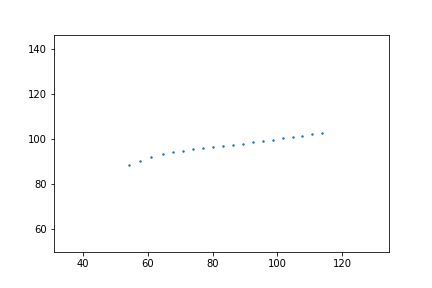

<IPython.core.display.Javascript object>


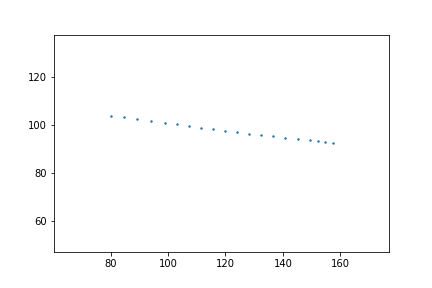

<IPython.core.display.Javascript object>


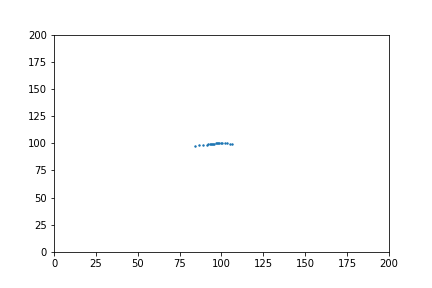

xz


In [20]:
i = 21

# spine values xy
spinex = xy_spine[0][i]
spiney = xy_spine[1][i]

# spine values xz
spinex2 = xz_spine[0][i]
spinez = xz_spine[1][i]

# spine values yz
spiney2 = yz_spine[0][i]
spinez2 = yz_spine[1][i]

plt.figure()
plt.scatter(spinex,[200-i for i in spiney],s=2)
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()

plt.figure()
plt.scatter(spinex2,[200-i for i in spinez],s=2)
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()

plt.figure()
plt.scatter(spiney2,[200-i for i in spinez2],s=2)
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()

if np.any(np.isnan(spiney2)):
    view_used = 'xz'
elif np.any(np.isnan(spinex2)):
    view_used = 'yz'
elif distance(spinex2[0],spinez[0],spinex2[-1],spinez[-1]) > distance(spiney2[0],spinez2[0],spiney2[-1],spinez2[-1]):
    view_used = 'xz'
else:
    view_used = 'yz'
    
print(view_used)

# real coordinates try

In [9]:
j_thorax = nearest_index_to(1, xy_spine, 1, original_instances)
j_thorax2 = nearest_index_to(1, xz_spine, 0, original_instances)
j_thorax3 = nearest_index_to(1, yz_spine, 2, original_instances)

21.274077653884888
21.236233234405518
21.23338222503662


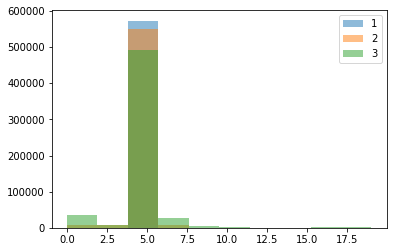

In [10]:
plt.figure()
plt.hist(j_thorax, alpha=0.5, label="1")
plt.hist(j_thorax2, alpha=0.5, label="2")
plt.hist(j_thorax3, alpha=0.5, label="3")
plt.legend()
plt.show()

In [ ]:
def get_3d_from(x,z,x2,y,y2,z2,view):
    

In [14]:
# datasets to save into
spinedata3D_raw = np.full((len(xy_spine[0]),1,20,3), np.nan)
spinedata3D = np.full((len(xy_spine[0]),1,20,3), np.nan)

# create coordinates
for i in range(len(xy_spine[0])):
    
    # spine values xy
    spinex = xy_spine[0][i]
    spiney = xy_spine[1][i]
    middle = j_thorax[i]
    
    # spine values xz
    spinex2 = xz_spine[0][i]
    spinez = xz_spine[1][i]
    middle2 = j_thorax2[i]
    
    # spine values yz
    spiney2 = yz_spine[0][i]
    spinez2 = yz_spine[1][i]
    middle3 = j_thorax3[i]
    
#     view_used = 'no_xy'
    
    # which view to we use xz vs yz
    if np.any(np.isnan(spiney2)):
        view_used = 'xz'
    elif np.any(np.isnan(spinex2)):
        view_used = 'yz'
    elif distance(spinex2[0],spinez[0],spinex2[-1],spinez[-1]) > distance(spiney2[0],spinez2[0],spiney2[-1],spinez2[-1]):
        view_used = 'xz'
    else:
        view_used = 'yz'

    # loop spine
    for j in range(len(spinex)):
        x = spinex2[j] - 100 + original_instances[0][0][i][0][1][0]
        z = spinez[j] - 100 + original_instances[0][0][i][0][1][1]
        x2 = spinex[j] - 100 + original_instances[0][1][i][0][1][0]
        y = spiney[j] - 100 + original_instances[0][1][i][0][1][1]
        y2 = spiney2[j] - 100 + original_instances[0][2][i][0][1][0]
        z2 = spinez2[j] - 100 + original_instances[0][2][i][0][1][1]
        
        try:
            if view_used == 'xz':
                [y2,z2] = cal.compute_YZ_imcoords_from_XZ_XY([x,z],[x2,y])[0]
            elif view_used == 'yz':
                [x,z] = cal.compute_XZ_imcoords_from_XY_YZ([x2,y],[y2,z2])[0]
            elif view_used == 'all':
                if np.any(np.isnan([x,z])):
                    [x,z] = cal.compute_XZ_imcoords_from_XY_YZ([x2,y],[y2,z2])[0]
                elif np.any(np.isnan([x2,y])):
                    [x2,y] = cal.compute_XY_imcoords_from_XZ_YZ([x,z],[y2,z2])[0]
                elif np.any(np.isnan([y2,z2])):
                    [y2,z2] = cal.compute_YZ_imcoords_from_XZ_XY([x,z],[x2,y])[0]
            
            spinedata3D[i][0][j] = cal.compute_XYZ_from_imageCoord_triplet(np.array([[x,z],[x2,y],[y2,z2]]))[0]
        except:
            spinedata3D[i][0][j] = [np.nan,np.nan,np.nan]
        

In [15]:
with h5py.File("spinedata3D_new.h5", "w") as f:
    f.create_dataset("spinedata3D", data=spinedata3D)

In [ ]:
print(original_instances[0][0][i][0][1])
print(original_instances[0][1][i][0][1])
print(original_instances[0][2][i][0][1])
print(x2,z)
print(x,y)
print(y2,z2)

# pixel coordinates

In [ ]:
spinedata3D = np.full((len(spines_x),1,20,3), np.nan)

# create correct 3d coordinates
for i in range(1000):
    coords_xyz = data_3D[0][i][0]
    middle = j_mins[i]
    tail_angle = np.arctan((coords_xyz[1][2] - coords_xyz[2][2]) / (coords_xyz[1][0] - coords_xyz[2][0]))
    head_angle = np.arctan((coords_xyz[0][2] - coords_xyz[1][2]) / (coords_xyz[0][0] - coords_xyz[1][0]))
    length = 0.2
#     x = np.copy(coords_xyz[0][0])
#     y = np.copy(coords_xyz[0][1])
#     z = np.copy(coords_xyz[0][2])
    x = 20
    y = 20
    z = 0
    angle = 0
#     angles_20[i][0] = angles_upperbody_360[0][i]
    spinedata3D[i][0][0] = [x,y,z]
    
    for j in range(len(angles_20[0])):
        angle = angle + angles_20[i][j]
        
        x = x - length * np.cos(angle/180*np.pi)
        y = y - length * np.sin(angle/180*np.pi)
        
        if j <= middle:
            z = z - length * np.sin(head_angle)
        else:
            z = z - length * np.sin(tail_angle)
        
        spinedata3D[i][0][j+1] = [x,y,z]

In [ ]:
# 2d spines raw centered

spinedata3D_raw = np.full((len(spines_x),1,20,3), np.nan)
original_raw = np.full((len(spines_x),1,3,3), np.nan)

# create coordinates
for i in range(1000):
    
    # Data bodypoints
    for j in range(3):
        original_instances[0][1]
        x = original_instances[0][1][i][0][j][0] - original_instances[0][1][i][0][1][0] + 60 - spines_x[i][middle]
        y = original_instances[0][1][i][0][j][1] - original_instances[0][1][i][0][1][1] + 60 - spines_y[i][middle]
        z = 0
        
        original_raw[i][0][j] = [x,y,z]
    
    # spine values
    spinex = spines_x[i]
    spiney = spines_y[i]
    
    # other values
    middle = j_mins[i]
    
    # loop other values
    for j in range(len(spinex)):
        
        x = spinex[j] - spines_x[i][middle]
        y = spiney[j] - spines_y[i][middle]
        z = 0
        
        spinedata3D_raw[i][0][j] = [x,y,z]

In [ ]:
# 2d spines raw

spinedata3D_raw = np.full((len(spines_x),1,20,3), np.nan)
original_raw = np.full((len(spines_x),1,3,3), np.nan)

# create coordinates
for i in range(1000):
    
    # Data bodypoints
    for j in range(3):
        original_instances[0][1]
        x = original_instances[0][1][i][0][j][0] 
        y = original_instances[0][1][i][0][j][1]
        z = 0
        
        original_raw[i][0][j] = [y,x,z]
    
    # spine values
    spinex = spines_x[i]
    spiney = spines_y[i]
    middle = j_mins[i]
    
    # loop spine
    for j in range(len(spinex)):
        
        x = spinex[j] - spines_x[i][middle] + original_instances[0][1][i][0][1][0]
        y = spiney[j] - spines_y[i][middle] + original_instances[0][1][i][0][1][1]
        z = 0
        
        spinedata3D_raw[i][0][j] = [y,x,z]

In [ ]:
# 3d spines raw

spinedata3D_raw = np.full((len(spines_x),1,20,3), np.nan)
spinedata3D = np.full((len(spines_x),1,20,3), np.nan)

# create coordinates
for i in range(60000):
    
    dz_h = original_instances[0][0][i][0][1][1] - original_instances[0][0][i][0][0][1]
    dz_t = original_instances[0][0][i][0][1][1] - original_instances[0][0][i][0][2][1]
    
    # spine values
    spinex = spines_x[i]
    spiney = spines_y[i]
    middle = j_mins[i]
    tail = j_tails[i]
    
    # loop spine
    for j in range(len(spinex)):
        
        x = spinex[j] - spines_x[i][middle] + original_instances[0][1][i][0][1][0]
        y = spiney[j] - spines_y[i][middle] + original_instances[0][1][i][0][1][1]
        
        x2 = spines_x[i][middle] - spinex[j] + original_instances[0][0][i][0][1][0]
        
        if j <= middle:
            z = original_instances[0][0][i][0][1][1] - (middle-j) * dz_h/middle
        else:
            z = original_instances[0][0][i][0][1][1] - (j - middle) * dz_t/(tail - middle)
        
        if np.any(np.isnan([x,x2,y,z])):
            continue
            
        yz = cal.compute_YZ_imcoords_from_XZ_XY([x2,z],[x,y])[0]
        spinedata3D[i][0][j] = cal.compute_XYZ_from_imageCoord_triplet(np.array([[x2,z],[x,y],[yz[0],yz[1]]]))[0]
        
#         print([x2,z],[x,y],[yz[0],yz[1]])
        
        spinedata3D_raw[i][0][j] = [y,x,z]
    
#     print(original_instances[0][0][i][0][0],original_instances[0][1][i][0][0],original_instances[0][2][i][0][0])
#     print(original_instances[0][0][i][0][1],original_instances[0][1][i][0][1],original_instances[0][2][i][0][1])
#     print(original_instances[0][0][i][0][2],original_instances[0][1][i][0][2],original_instances[0][2][i][0][2])
#     break

In [ ]:
# print(spinedata3D[0][0][1])
frame = 50000

hd = [original_instances[0][0][frame][0][0],original_instances[0][1][frame][0][0],original_instances[0][2][frame][0][0]]
thrx = [original_instances[0][0][frame][0][1],original_instances[0][1][frame][0][1],original_instances[0][2][frame][0][1]]
tl = [original_instances[0][0][frame][0][2],original_instances[0][1][frame][0][2],original_instances[0][2][frame][0][2]]
xz=original_instances[0][0][frame][0][1]
# xy=original_instances[0][1][frame][0][1]
# yz=original_instances[0][2][frame][0][1]
print(xz)
print(hd)
print(thrx)
print(tl)
# print(cal.compute_XYZ_from_imageCoord_triplet(np.array([xz,xy,yz]))[0])
print(spinedata3D_raw[frame])

In [ ]:
# print(spinedata3D[frame])
coords_xz = original_instances[0][0][frame][0]
coords_xy = original_instances[0][1][frame][0]
middle = j_mins[frame]
tail_dz = coords_xz[2][1] - coords_xz[1][1]
head_dz = coords_xz[0][1] - coords_xz[1][1]

x = spines_x[frame][middle] - 60 + coords_xy[1][0]
y = spines_y[frame][middle] - 60 + coords_xy[1][1]
z = coords_xz[1][1] + (head_dz / middle * (middle - middle))

yz = cal.compute_YZ_imcoords_from_XZ_XY([x,z],[x,y])[0]
print([x,z],[x,y],yz)
print(cal.compute_XYZ_from_imageCoord_triplet(np.array([[x,z],[x,y],yz])))

In [ ]:
spines_x[frame][middle]

In [ ]:
print([i-60 for i in spines_x[frame]])
print([i-60 for i in spines_y[frame]])
print(coords_xy[1])

In [ ]:
print(angles_upperbody_360[0][999])

In [10]:
file_path = './spinedata3D.h5'

spinedata3D = []
spinedata3D_raw = []

with h5py.File(file_path, 'r') as f:
    spinedata3D.append(np.copy(f['spinedata3D']))
    spinedata3D_raw.append(np.copy(f['spinedata3D']))


<IPython.core.display.Javascript object>


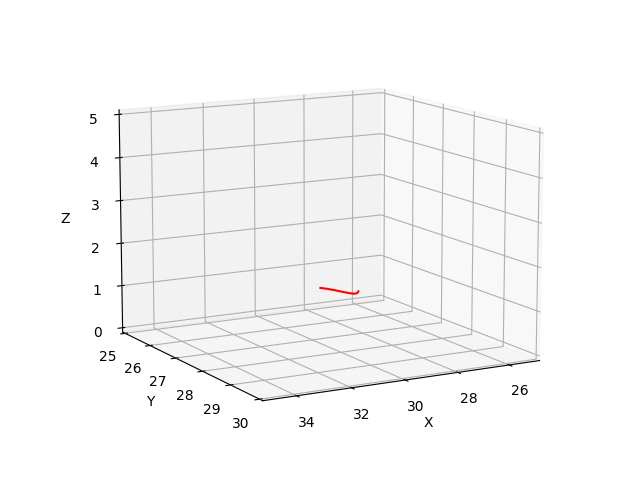

0.21011018753051758


In [15]:
# make the movie
t0 = time.time()

# frame range
f0 = 0
fE = 69

make_movie(spinedata3D[0], spinedata3D_raw, f0, fE, './xytestoke.mp4',10,45)

tE = time.time()
print(tE-t0)

In [ ]:
# make the movie
t0 = time.time()

# frame range
f0 = 10000
fE = 20000

make_movie(spinedata3D, spinedata3D_raw, f0, fE, './3D_combi2_10000to20000_xz.mp4', 0, 90)

tE = time.time()
print(tE-t0)



In [ ]:
# make the movie
t0 = time.time()

# frame range
f0 = 10000
fE = 20000

make_movie(spinedata3D, spinedata3D_raw, f0, fE, './3D_combi2_10000to20000_xy.mp4', 90, 0)

tE = time.time()
print(tE-t0)



In [ ]:
# make the movie
t0 = time.time()

# frame range
f0 = 10000
fE = 20000

make_movie(spinedata3D, spinedata3D_raw, f0, fE, './3D_combi2_10000to20000_yz.mp4', 0, 0)

tE = time.time()
print(tE-t0)

In [ ]:
print(spinedata3D[90000][0])
print(len(spines_x))

In [ ]:
spinedata3D.shape

In [ ]:
spinedata2D = np.full((1000,1,20,4), np.nan)

# create correct 3d coordinates
for i in range(1000):
    coords_xz = original_instances[0][0][i][0]
    coords_xy = original_instances[0][1][i][0]
    coords_yz = original_instances[0][2][i][0]
    
    middle = j_mins[i]
    
    tail_dz1 = coords_xz[2][1] - coords_xz[1][1]
    head_dz1 = coords_xz[0][1] - coords_xz[1][1]
    tail_dz2 = coords_yz[2][1] - coords_yz[1][1]
    head_dz2 = coords_yz[0][1] - coords_yz[1][1]
    
    for j in range(len(spines_x[i])):
        x = spines_x[i][j] - 60 + coords_xy[1][0]
        y = spines_y[i][j] - 60 + coords_xy[1][1]
        
        
        
        if j <= middle:
            z1 = coords_xz[1][1] + (head_dz1 / middle * (j - middle))
        else:
            z1 = coords_xz[1][1] + (tail_dz1 / (19 - middle) * (middle - j))
        if j <= middle:
            z2 = coords_yz[1][1] + (head_dz2 / middle * (j - middle))
        else:
            z2 = coords_yz[1][1] + (tail_dz2 / (19 - middle) * (middle - j))
        
        spinedata2D[i][0][j] = [x, y, z1,z2]
        
        
#         if np.any(np.isnan([x,y,z1,z2])):
#             spinedata3D[i][0][j] = [np.nan, np.nan, np.nan]
            
#         else:
#             # compute 3D from data
#             bp_3D = cal.compute_XYZ_from_imageCoord_triplet(np.array([[x,z1],[x,y],[y,z1]]))
#             spinedata3D[i][0][j] = bp_3D

In [ ]:
plt.figure()
plt.scatter([i[1] for i in spinedata2D[0][0]],[i[2] for i in spinedata2D[0][0]])
plt.show()

In [ ]:
original_instances[0][0][0][0]

In [ ]:
plt.figure()
plt.hist([i[0][0][2] for i in spinedata3D])
plt.show()